In [1]:
import matplotlib as mpl
params = {'axes.spines.right': False,
          'axes.spines.top': False,
          'legend.fontsize': 12,
          'axes.labelsize': 12,
          'axes.titlesize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'pdf.fonttype': 42,
          'ps.fonttype': 42}
mpl.rcParams.update(params)
import matplotlib.pyplot as plt
import numpy as np

import nems.db as nd
from nems_lbhb.baphy_experiment import BAPHYExperiment
from nems.utils import smooth
from nems_lbhb import plots as nplt
from nems.xform_helper import load_model_xform

[nems.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2021-10-22 135910.log
/auto/users/mateo/nems_db/nems_lbhb/SettingXML.py:66: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  {K: SubEl.get(K) for K in SubEl.keys() if K is not 'name'}
/auto/users/mateo/nems_db/nems_lbhb/SettingXML.py:76: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  {K: SubEl.get(K) for K in SubEl.keys() if K is not 'name'}
/auto/users/mateo/nems_db/nems_lbhb/SettingXML.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  {K: SubEl.get(K) for K in SubEl.keys() if K is not 'name'}
/auto/users/mateo/nems_db/nems_lbhb/plots.py:757: SyntaxWarning: "is" with a literal. Did you mean "=="?
  while tf is 0:
/auto/users/mateo/NEMS/nems/fitters/mappers.py:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if which is 'lower':
/auto/users/mateo/NEMS/nems/fitters/mappers.py:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif which is 'upper':
/auto/u

In [2]:
def get_rec(parmfile, cellid, rasterfs=1000):
    e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
    
    #t = cellid.split("-")
    #e.channels_to_load = [int(t[1])]
    #e.units_to_load = [int(t[2])]

    options={'resp': 1, 'rasterfs': rasterfs}
    
    rec = e.get_recording(**options)
    return rec

# PSTH analysis

Pick a run class

In [3]:
runclass='TOR'
rasterfs=100

runclass='CPN'
rasterfs=100

# runclass='FTC'
#rasterfs=500

sql="select sCellFile.*,gSingleCell.siteid,gSingleCell.phototag from gSingleCell INNER JOIN sCellFile ON gSingleCell.id=sCellFile.singleid" +\
   " INNER JOIN gRunClass on gRunClass.id=sCellFile.runclassid" +\
   f" WHERE gRunClass.name='{runclass}' AND not(isnull(phototag))"
d=nd.pd_query(sql)
d['parmfile']=d['stimpath']+d['stimfile']
print(len(d))
d.groupby('phototag').count()['cellid']

[numexpr.utils INFO] NumExpr defaulting to 8 threads.


363


phototag
a     35
n    144
s    184
Name: cellid, dtype: int64

In [4]:
d['parmfile'].unique()

array(['/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m',
       '/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m'], dtype=object)

In [5]:
parmfile="/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m"
cellid="TNC014a-01-2"
rasterfs=1000  # or whatever rate you want

e = BAPHYExperiment(parmfile=parmfile, cellid=cellid)
options={'resp': 1, 'rasterfs': rasterfs}    
rec = e.get_recording(**options)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_b31e7be8fed4068d1280ca6abd783e7ccdbbeead.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


Load all A cells (sort of slow)

In [6]:
e_resp=[]
error_cellid=[]
for i, r in d.loc[d.phototag=='a'].iterrows():
    try:
        rec = get_rec(r.parmfile, r.cellid, rasterfs=500)
        rec['resp']=rec['resp'].rasterize()
        r=rec['resp'].extract_epoch('REFERENCE')
        e_resp.append(smooth(r.mean(axis=0)[0,:],5))
    except:
        error_cellid.append(r.cellid)


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_963af78fd72e133caf2da6e7d1fb1c827f2cfa52.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_93ba346b3536e077ccf702cc01af1246a49c940f.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC013a/TNC013a_768a45d9c847cbaf8efe5db41c0068c96162c069.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC013a/TNC013a_81f4cd3833bfd21ea929a80595ea51b1d0b1d9de.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC013a/TNC013a_7d6b1ef70a38d890f5cd1675f0fcd59a0069bdad.tgz
[n

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_ed8c7aa3266bd352523307ec4720ff703467bc12.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_bc686e5ade9d8b8867de775df2db44d59b54c158.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_ea631cc8dcdf84e3679d9dfb2ede9b170618772d.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_390dd0746d8ae36a7aa009c91d4b7f6916833086.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response e

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_e45deb5fddc3da58514b9885a5ccf1fa3b9bced6.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_5f4a0bb35d67359c56d1d7a77a8338f0dbf8e643.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_9246f754f090b28e415863fe0d380137a68385e6.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_4bd10bdbad5acf2af9c5d8cd552503f92f438d50.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loa

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_09588dc6e5e615bd91ea0d450839e60561d93379.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_73b664ef5172640dd1992cb7b643606d05894840.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_a21b1908eab2f63a8ef7a6b098cb0a2f9c6fa0d7.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response e

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_d06d22146892987e7faebbe99937c522f992f075.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found
[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_856382b9e68bf120cdd164d7cbe4777b06963a98.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.0

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_750224066b453f331be91a85d30041fdc2ed88c7.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_a424bb266fa5e52b25681cea415b1e1067ebbc2d.tgz
[nems_lbhb.baphy_experiment INFO] Cached recording found


Load all S cells (slower)

In [7]:
i_resp=[]
for i, r in d.loc[d.phototag=='s'].iterrows():
    try:
        rec = get_rec(r.parmfile, r.cellid, rasterfs=500)
        rec['resp']=rec['resp'].rasterize()
        r=rec['resp'].extract_epoch('REFERENCE')
        i_resp.append(smooth(r.mean(axis=0)[0,:],5))
    except:
        error_cellid.append(r.cellid)

[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_2e775eabd6a87222656b2d942936daa5d4592787.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_d5661213365b1d28de0cd5e725a2258853893eb2.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_07fd0d02cbfc3783e7b4a277ea7dd3f30d2e495b.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_03e8001ca11b0c7e135291145bc7cf2ea3a07c56.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_4475bda1122e3c4db573c95d29a0b12c91466a98.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_52c7264cc85678a1454e4b0e5e9c34a1b85e9b06.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_27418d88da1340e4bee059c81f7a093933a03948.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_613d00c4ff86cf15c170a29077a7686b00df689c.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_ddca9df8224b8c2c70de0978d65a23d329f3ca3d.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_788920a5b9c5556e8d5b69d9a12cd86862a11da6.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC014a/TNC014a_03e8f9041afd997b77d732b0cfebb129c74ec4a6.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2910.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC014/TNC014a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2907.56 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC013/TNC013a09_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_a5f443415e7db38525c0c53bdf8d37f0e98d4204.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_8ba0b7ab1aa045a5cb883e34dbfc1311e3947abc.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC015a/TNC015a_6b7dcb205696e010f43facfa00330fda21ac562d.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2940.34 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC015/TNC015a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC017a/TNC017a_552a2dbe0d22ce3884fb1085671269c1e60272e5.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2923.24 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC017/TNC017a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_093da29c799b566ae0dd1e589f4b210912a45697.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC016a/TNC016a_003d92f1a2545ee7d8500886fe733d033aa9ac75.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2908.81 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC016/TNC016a11_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_7ad3d994acd2d27e8cef3a451850d2bc7679308e.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_0d191a894ce8bce7d6555464f3ffd4c4662947b2.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_63e8e1d191a192fcbfb42655d7f997f51a7c0e48.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_34d2a7022a93126c3a66486169e6840c980eaa3e.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_1a283d83701b80dc556e3ac518c3bbf7d9ef031e.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_b7ebb63e1316ca5d54a2c0e712ec6a86ad7a76b5.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_7dad2bfe58d77040ae39596a2f307e0b29f7f0dd.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_0cb3c39b45f9c32569a6e0da48fffa4259044aab.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_experiment INFO] Cached recording: /auto/data/nems_db/recordings/Teonancatl/TNC018a/TNC018a_4c20cc3dd96d1bfbadaa939edde8b3a0306ba763.tgz
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_expe

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Remove post-response events
[nems_lbhb.baphy_experiment INFO] Removing post-reponse data
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[nems_lbhb.baphy_io INFO] 200 trials totaling 2924.09 sec
[nems_lbhb.baphy_io INFO] Loading /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.m
[nems_lbhb.baphy_io INFO] evp file for licks: /auto/data/daq/Teonancatl/TNC018/TNC018a12_p_CPN.evp
[nems_lbhb.baphy_experiment INFO] Creating trial epochs
[nems_lbhb.baphy_experiment INFO] Creating stim epochs
[nems_lbhb.baphy_experiment INFO] Creating Light epochs
[nems_lbhb.baphy_io INFO] rounding Trial offset spike times to even number of rasterfs bins
[

0 resp


In [8]:
d.loc[d.phototag=='s']

,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,respfile,...,sortidx,model,stimsnr,area,goodtrials,respZ,respSNR,siteid,phototag,parmfile
0,140851,TNC014a-01-2,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
1,140852,TNC014a-04-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
2,140853,TNC014a-04-2,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
3,140854,TNC014a-05-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
4,140855,TNC014a-07-1,45704,143942,0,121,/auto/data/daq/Teonancatl/TNC014/sorted/,87359488,20,TNC014a09_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC014a,s,/auto/data/daq/Teonancatl/TNC014/TNC014a09_p_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,145187,TNC018a-45-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
349,145188,TNC018a-46-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
350,145189,TNC018a-46-2,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...
351,145190,TNC018a-48-1,45727,144212,0,121,/auto/data/daq/Teonancatl/TNC018/sorted/,87771136,20,TNC018a12_p_CPN.spk.mat,...,1,0,1000,A1,,0.0,0.0,TNC018a,s,/auto/data/daq/Teonancatl/TNC018/TNC018a12_p_C...


In [9]:
print('error cellids:', error_cellid)

error cellids: []


270.0 262.0


Text(0.5, 1.0, 'spont rate')

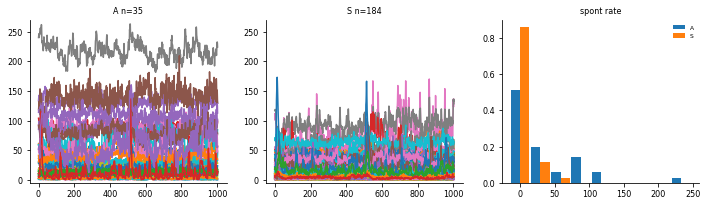

In [10]:
f,ax = plt.subplots(1,3,figsize=(12,3))

re=np.stack(e_resp) * rasterfs
ri=np.stack(i_resp) * rasterfs
ymax=np.ceil(np.max([re.max(), ri.max()])/10)*10
y0max=np.ceil(np.max([re[:,:50].max(), ri[:,:50].max()]))
print(ymax, y0max)
ax[0].plot(re.T);
ax[0].set_title(f'A n={re.shape[0]}')
ax[0].set_ylim([-5, ymax])

ax[1].plot(ri.T)
ax[1].set_title(f'S n={ri.shape[0]}');
ax[1].set_ylim([-5, ymax])

bins=np.linspace(0,y0max,10)
n0,b0 = np.histogram(re[:,:50].mean(axis=1), bins=bins)
n1,b1 = np.histogram(ri[:,:50].mean(axis=1), bins=bins)
n0= n0/n0.sum()
n1=n1/n1.sum()
w=(b0[1]-b0[0])/2.2
ax[2].bar(b0[:-1]-w/2,n0,width=w,label='A');
ax[2].bar(b0[:-1]+w/2,n1,width=w,label='S');
ax[2].legend(frameon=False);
ax[2].set_title('spont rate')
#f.suptitle(runclass)

# pupil pred

In [11]:
runclass='CPN'
rasterfs=100

# runclass='FTC'
#rasterfs=500

sql="select sCellFile.*,gSingleCell.siteid,gSingleCell.phototag from gSingleCell INNER JOIN sCellFile ON gSingleCell.id=sCellFile.singleid" +\
   " INNER JOIN gRunClass on gRunClass.id=sCellFile.runclassid" +\
   f" WHERE gRunClass.name='{runclass}' AND not(isnull(phototag))"
d=nd.pd_query(sql)
d['parmfile']=d['stimpath']+d['stimfile']
d=d.set_index('cellid')



In [12]:
#modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn.seq-hrc-psthfr_sdexp2.S_jk.nf20-basic',
#              'psth.fs20.pup-ld-st.pup-epcpn.seq-hrc-psthfr_sdexp2.S_jk.nf20-basic']
modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_sdexp2.S_jk.nf20-basic',
              'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_sdexp2.S_jk.nf20-basic']
modelnames = ['psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic',
              'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic']
batch=331

In [13]:
dpred = nd.batch_comp(batch=batch,modelnames=modelnames)
dpred = dpred.merge(d['phototag'],how='inner',left_index=True, right_index=True)
dpred['siteid'] = dpred.index
dpred['siteid']=dpred['siteid'].apply(nd.get_siteid)
dpred['diff'] = dpred[modelnames[1]]-dpred[modelnames[0]]

dmean=dpred.groupby('phototag').mean()  # .reset_index()
dcount=dpred.groupby('phototag').count()  # .reset_index()
dcount['n']=dcount[modelnames[0]]
dmean=dmean.merge(dcount['n'],how='inner',left_index=True, right_index=True)
dmean['label'] = [f"{i.upper()} n={r.n:.0f} delta={r['diff']:.3f}" for i,r in dmean.iterrows()]
dpred=dpred.merge(dmean[['label']],how='inner',left_on='phototag', right_index=True)
dpred.head()


,psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,phototag,siteid,diff,label
cellid,,,,,,
TNC013a-01-2,0.098287,0.133108,s,TNC013a,0.034821,S n=160 delta=0.011
TNC013a-03-1,0.100481,0.214315,s,TNC013a,0.113834,S n=160 delta=0.011
TNC013a-10-1,0.126169,0.129052,s,TNC013a,0.002883,S n=160 delta=0.011
TNC013a-12-1,0.256507,0.259596,s,TNC013a,0.003088,S n=160 delta=0.011
TNC013a-20-1,0.125104,0.206893,s,TNC013a,0.081789,S n=160 delta=0.011


In [14]:
cellid=dpred.index[0]
dpred['g']=1
dpred['d']=0
for cellid in dpred.index:
    xf,ctx=load_model_xform(cellid=cellid,modelname=modelnames[1],batch=batch,eval_model=False)
    dpred.loc[cellid,'d']=ctx['modelspec'].phi[0]['d'][0,1]
    dpred.loc[cellid,'g']=ctx['modelspec'].phi[0]['g'][0,1]
    

[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-01-2/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220425 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-03-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220425 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-10-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220437 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-12-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220443 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/331/TNC013a-20-1/psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr.stategain.S.jk.nf20-basic.2021-09-16T220458 ...
[nems.xforms INFO] Loading xfspec and context from /auto/data/nems_db/results/33

In [15]:
dpred.head()

,psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic,phototag,siteid,diff,label,g,d
cellid,,,,,,,,
TNC013a-01-2,0.098287,0.133108,s,TNC013a,0.034821,S n=160 delta=0.011,-0.000350,-0.025267
TNC013a-03-1,0.100481,0.214315,s,TNC013a,0.113834,S n=160 delta=0.011,-0.002375,-0.102013
TNC013a-10-1,0.126169,0.129052,s,TNC013a,0.002883,S n=160 delta=0.011,0.000109,-0.003755
TNC013a-12-1,0.256507,0.259596,s,TNC013a,0.003088,S n=160 delta=0.011,0.183123,-0.011791
TNC013a-20-1,0.125104,0.206893,s,TNC013a,0.081789,S n=160 delta=0.011,0.612061,0.156850


In [16]:
dpred['diff'] = dpred[modelnames[1]]-dpred[modelnames[0]]
dm = dpred.groupby(['siteid','phototag']).mean()
dmc = dpred.groupby(['siteid','phototag']).count()

dm = dm[['diff']].merge(dmc['label'],how='inner',left_index=True, right_index=True)

In [17]:
dmc

psth.fs20.pup-ld-st.pup0-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic  \
siteid  phototag                                                                        
TNC013a a                                                        12                     
        n                                                        32                     
        s                                                        15                     
TNC014a a                                                         1                     
        n                                                        13                     
        s                                                        37                     
TNC015a a                                                         6                     
        n                                                        15                     
        s                                                        12                     
TNC016a a                                                         5                     
        n                                                        20                     
        s                                                        16                     
TNC017a a                                                         1                     
        n                                                        26                     
        s                                                        32                     
TNC018a a                                                         8                     
        n                                                        13                     
        s                                                        48                     

                  psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic  \
siteid  phototag                                                                       
TNC013a a                                                        12                    
        n                                                        32                    
        s                                                        15                    
TNC014a a                                                         1                    
        n                                                        13                    
        s                                                        37                    
TNC015a a                                                         6                    
        n                                                        15                    
        s                                                        12                    
TNC016a a                                                         5                    
        n                                                        20                    
        s                                                        16                    
TNC017a a                                                         1                    
        n                                                        26                    
        s                                                        32                    
TNC018a a                                                         8                    
        n                                                        13                    
        s                                                        48                    

                  diff  label   g   d  
siteid  phototag                       
TNC013a a           12     12  12  12  
        n           32     32  32  32  
        s           15     15  15  15  
TNC014a a            1      1   1   1  
        n           13     13  13  13  
        s           37     37  37  37  
TNC015a a            6      6   6   6  
        n           15     15  15  15  
        s           12     12  12  12  
TNC016a a            5      5   5   

Text(0.5, 0.98, 'psth.fs20.pup-ld-st.pup-epcpn-hrc-psthfr_stategain.S_jk.nf20-basic')

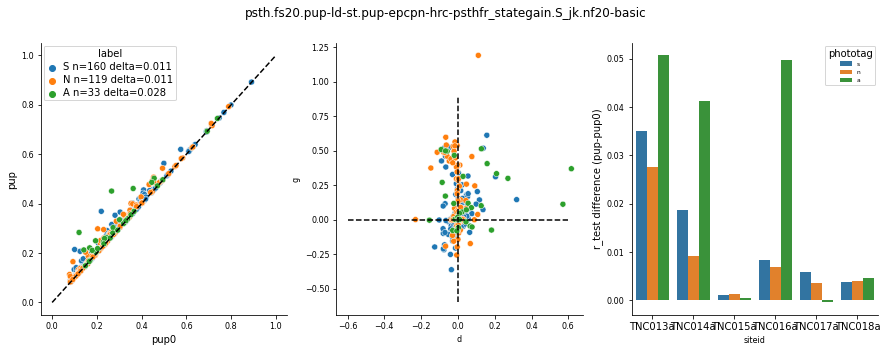

In [18]:
from seaborn import scatterplot, barplot
f,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].plot([0.0,1],[0.0,1],'k--')
scatterplot(data=dpred, x=modelnames[0], y=modelnames[1], hue='label', ax=ax[0]);
plt.setp(ax[0].get_legend().get_texts(), fontsize='10'); #, frameon=False)
ax[0].set_xlabel('pup0',fontsize=10)
ax[0].set_ylabel('pup',fontsize=10)

ax[1].plot([-0.6,0.6],[0.0,0],'k--')
ax[1].plot([0.0,0],[-0.6,0.9],'k--')
scatterplot(data=dpred, x='d', y='g', hue='label', ax=ax[1], legend=False);

barplot(data=dm.reset_index(), x='siteid', y='diff', hue='phototag', ax=ax[2], hue_order=['s','n','a'])
plt.setp(ax[2].get_xticklabels(), fontsize='10'); #, frameon=False)
ax[2].set_ylabel('r_test difference (pup-pup0)',fontsize=10)

f.suptitle(modelnames[1])